In [1]:
import pandas as pd
from io import StringIO
import sys


csv_data = \
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [2]:
df.isnull().sum()
#isnull() method return a dataframe with Boolean values that
#indicate whether a cell contains a numeric value(False) or if the data is missing (True)
#Using sum method, we can then return the number of missing values per column


A    0
B    0
C    1
D    1
dtype: int64

In [3]:
#access the underlying NumPy array via the 'values' attribute
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

In [4]:
#Eliminating samples or features with missing values

#remove rows that contain missing values

df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [5]:
#remove columns that contain missing values
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [6]:
#only drop rows where all columns are NaN
df.dropna(how="all")

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [7]:
#drop rows that have less than 3 real values
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [8]:
#only drop rows where NaN appear in specific columns (here: 'C')
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


In [9]:
#Imputing missing values
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

In [10]:
#impute missing values via the column mean
from sklearn.preprocessing import Imputer

imr = Imputer(missing_values='NaN',strategy='mean',axis=0) #axis = 1 row mean
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)

imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [11]:
#Handling categorical data
#nominal and ordinal features

import pandas as pd

df = pd.DataFrame([['green','M',10.1,'class1'],
                   ['red','L',13.5,'class2'],
                   ['blue','XL',15.3,'class1']])
df.columns = ['color','size','price','classlabel']

df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [12]:
#Mapping ordinal features
#ordinal features can be understood as categorical values that can be sorted or ordered

#no convenient function, have to define manully

size_mapping={'XL':3,
              'L':2,
              'M':1}

df['size']=df['size'].map(size_mapping)
df



,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [13]:
#transform the integer back to the original string representation
#define a reverse-mapping dictionary

inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

In [15]:
#Encoding class labels

import numpy as np

#create a mapping dict
#to convert class labels from strings to integers
#remember that class labels are not ordinal, and it does not matter which integer number we assign to a particular string label


class_mapping ={label: idx for idx, label in 
                enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [16]:
#to convert class labels from strings to integers
df['classlabel']=df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [17]:
#reverse the class label mapping
class_mapping.items()

dict_items([('class1', 0), ('class2', 1)])

In [18]:
inv_class_mapping = {v:k for k, v in class_mapping.items()}
df['classlabel']=df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [23]:
#alternatively, there is a convenient LabelEncoder class directly implemented in scikit-learn to achieve this:
#fit_transform method is just a shortcut for calling fit and transform separately

from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)

y

array([0, 1, 0])

In [24]:
#we can use the inverse_transform method to transform the integer class labels back into their original string representation

class_le.inverse_transform(y)


/home/Rex/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['class1', 'class2', 'class1'], dtype=object)

In [25]:
#performing one-hot encoding on nominal features

X = df[['color','size','price']].values

color_le = LabelEncoder()
X[:,0] = color_le.fit_transform(X[:,0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [27]:
#however, although the color values don't come in any particular order,
#a learning algorithm will now assume that 'green' is larger than 'blue'
#it might be misleading and the output may not be the optimal
#a workaround for this problem is to use a technique called one-hot encoding
#the idea behind this approach is to create a new dummy feature for each unique value in the nominal feature column

#here we will convert the color feature into three new features: blue, green, and red
#perform this transformation, we can use OneHotEncoder that is implemented in the scikit-learn.preprocessing module

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(categorical_features=[0])

ohe.fit_transform(X).toarray()

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [28]:
#By default, the OneHotEncoder returns a sparse matrix when we use the transform method
#and we converted the sparse matrix representation into a regular (dense) NumPy array for the purpose of visualization via the toarray method
#Sparse matrices are a more efficient way of storing large datasets and one that is supported by many scikit-learn functions
#which is especially useful if an array contains a lot of zeros
#Alternatively, we can initialze the encoder as OneHotEncoder(..., sparse = False) to return a regular NumPy array

ohe = OneHotEncoder(categorical_features=[0],sparse=False)
ohe.fit_transform(X)

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [29]:
#we can also create dummy features via one-hot encoding 
#using the get_dummies method implemented in pandas
#it only convert string columns and leave all other columns unchanged

pd.get_dummies(df[['price','color','size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


In [30]:
#using one-hot encoding will introduce multicollinearity, 
#which is bad for any method that requires matrix inversion
#solution is to remove one feature column from the one-hot encoded array

#multicollinearity guard in get_dummies

pd.get_dummies(df[['price','color','size']],drop_first=True)


,price,size,color_green,color_red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


In [31]:
#multicollinearity guard for the OneHotEncoder
#manually

ohe = OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()[:,1:]



array([[ 1. ,  0. ,  1. , 10.1],
       [ 0. ,  1. ,  2. , 13.5],
       [ 0. ,  0. ,  3. , 15.3]])

In [40]:
#Partitioning a dataset into separate training and test sets
#we will prepare a new dataset, the Wine dataset.
#After we preprocess the dataset, we will explore different techniques for feature selection to reduce the dimensionality

#usig the pandas library, we will directly read in he open source Wine dataset from the UCI machine learning repository

df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/'
                      'wine/wine.data',header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']
print('Class labels',np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [43]:
#The samples belong to one of three different classes, 1,2,3, referring to three different types of grape grown in the same region in Italy but derived from different wine cultivars

#A convenient way to randomly partition this dataset into separate test and training datasets is to use the train_test_split function from scikit-learn's model_selection submodule

#30% test data, 70% training data, stratify ensures that both training and test datasets have the same class proportions as the original dataset

from sklearn.model_selection import train_test_split

X,y = df_wine.iloc[:,1:].values,df_wine.iloc[:,0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X,y,test_size=0.3,random_state=0,stratify=y)

In [44]:
#Bringing features onto the same scale

#Feature scaln is crucial
#Decision trees and random forests are two of the very few machine learning algorithm where we don't need to worry about feature scaling
#Most algorithms are not scale invariant, and optimization algorithms behave much better if features are on the same scale
#such as gradient descent

#Two common approaches, normalization and standardizatin

#normalization refers to the rescaling of the features to a range of [0,1]
#useful when we have a bounded inteval

from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [45]:
#Standardization centers the feature columns at mean 0 with standard deviation 1 so that the feature columns takes the form of a normal distribution
#maintain useful info about outliers and makes the algo less sensitive to them in contrast to min-max scaling

from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)



In [49]:
#A visual example

ex = np.array([0,1,2,3,4,5])

print('standardized:', (ex-ex.mean())/ex.std())

# Please note that pandas uses ddof=1 (sample standard deviation) 
# by default, whereas NumPy's std method and the StandardScaler
# uses ddof=0 (population standard deviation)

print('normalized:', (ex-ex.min())/(ex.max()-ex.min()))

standardized: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
normalized: [0.  0.2 0.4 0.6 0.8 1. ]


In [50]:
#Selecting meaningful features

#prevent overfitting
#Common solutions:
# collect more training data
# Introduce a penalty for complexity via regularization
# Choose a simpler model with fewer parameters
# Reduce the dimentionality of the data

#This chapter will introduce regularization and dimensionality reduction via feature selection

#L2 regularization: penalizing large individual weights by adding bias and preferring a simpler model to reduce the variance
                    
#L1 regularization: replace the squares of the weights by absolute value
#                 : yields sparse feature vectors, most feature weights will be zero
#                 : technique for feature selection

#lambda:increase lambda increase the regularization strength
#       large lambda shrink the weights towards 0 and decrease the dependence of our model on the training data

#for regularized model in scikit-learn that support L1 regularization, we can simply
#set the penalty parameter to 'l1' to obtain a sparse solution:

from sklearn.linear_model import LogisticRegression

LogisticRegression(penalty='l1')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [52]:
lr = LogisticRegression(penalty='l1',C=1.0)
#Note that C = 1.0 is the default,
#you can increase or decrease it to make the regularization effect stronger or weaker respectively

lr.fit(X_train_std,y_train)
print('Training accuracy:', lr.score(X_train_std,y_train))
print('Test accuracy:', lr.score(X_test_std,y_test))

Training accuracy: 1.0
Test accuracy: 1.0


In [54]:
#access the intercept term

lr.intercept_

#Since we fit the LogisticRegression object on a multiclass dataset,
#it uses the One-versus-Rest (OvR) approach by default,
#the first intercept belongs to the model that fits class 1 v.s. class 2 and 3
#the second intercept belongs to the model that fits class 2 v.s. class 1 and 3
#the third intercept belongs to the model that fits class 3 v.s. class 1 and 2

array([-1.2633684 , -1.21610497, -2.3713488 ])

In [55]:
#access the weights

lr.coef_

#one weight vector for each class

array([[ 1.24587317,  0.18060614,  0.74371694, -1.16139264,  0.        ,
         0.        ,  1.17006833,  0.        ,  0.        ,  0.        ,
         0.        ,  0.54693796,  2.51040264],
       [-1.53717633, -0.38710002, -0.99515243,  0.36444091, -0.05938356,
         0.        ,  0.66813309,  0.        ,  0.        , -1.93401163,
         1.23435935,  0.        , -2.23230314],
       [ 0.13506411,  0.16979415,  0.35777418,  0.        ,  0.        ,
         0.        , -2.43232895,  0.        ,  0.        ,  1.56181748,
        -0.81749651, -0.49854103,  0.        ]])

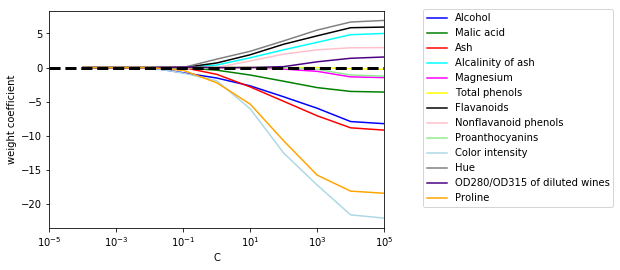

In [81]:
#Vary the regularization strength and plot the regularization path
#the weight coefficients of the different features for different regularization strength

import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)

colors = ['blue','green','red','cyan',
          'magenta','yellow','black',
          'pink','lightgreen','lightblue',
          'gray','indigo','orange']

weights, params = [], []

for c in np.arange(-4.,6.):
    lr = LogisticRegression(penalty='l1',
                           C = 10.**c,
                           random_state = 0)
    lr.fit(X_train_std,y_train)
    weights.append(lr.coef_[1]) #only append the first model
    params.append(10**c)
    
weights = np.array(weights)

for column, color in zip(range(weights.shape[1]),colors):
    #'range' creates an array from 0 to number of columns
    #'zip' assign each color to one column number(feature)
    plt.plot(params,weights[:,column], #plot all the weights of a feature against the params
             label = df_wine.columns[column+1],
             #'column+1' because the first column is the intercept, irrelevent
             color = color)

plt.axhline(0,color='black',linestyle='--',linewidth=3) #horizontal line at y = 0
plt.xlim([10**(-5),10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
ax.legend(bbox_to_anchor=(1.1, 1.03),fancybox=True)
plt.show()
    

In [96]:
#Sequential feature selection algorithms

#Dimensionality reduction: feature selection and feature extraction

#feature selection: select a subset of the orginal features
#feature extraction: derive information from the feature set to construct a new feature subspace

#Sequential feature selection algorithms are a family of greedy search algorithms
#that are used to reduce the number of features in the training set
#motivation is to automatically select a subset of features that are most relevant to the problem
#improve computation efficiency or reduce the generalization error by removing irrelevant features or noise

#Sequential Backward Selection (SBS) is one of the classics
#minimum decay in performance of the classifier to improve upon computational efficiency
#logic: we eliminate the feature that causes the least performance loss after removal

#No scikit-learn yet, we need to self implement

from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS():
    
    def __init__(self,estimator, k_features, scoring = accuracy_score,
                test_size = 0.25,random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features= k_features #specify the desired number of features we want to return
        self.test_size = test_size
        self.random_state =random_state
        
    def fit(self,X,y):
        X_train, X_test, y_train, y_test = \
         train_test_split(X,y,test_size=self.test_size,
                          random_state=self.random_state)
        #note that the so-called _test data are validation dataset
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train,y_train,X_test,y_test,self.indices_)
        self.scores_ = [score]
        
        while dim > self.k_features:
            scores = []
            subsets = []
            
            for p in combinations(self.indices_,r=dim-1):
                score = self._calc_score(X_train,y_train,X_test,y_test,p)
                scores.append(score)
                subsets.append(p)
            
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            
            #instead of calculating the criterion explicitly inside the fit method
            #we simply removed the feature that is not contained in the best performing feature subsets
            self.scores_.append(scores[best])
            
        self.k_scores_ = self.scores_[-1]
        
        return self
    
    def transform(self,X):
        return X[:,self.indices_]
        
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:,indices],y_train)
        y_pred = self.estimator.predict(X_test[:,indices])
        score = self.scoring(y_test,y_pred)
        return score


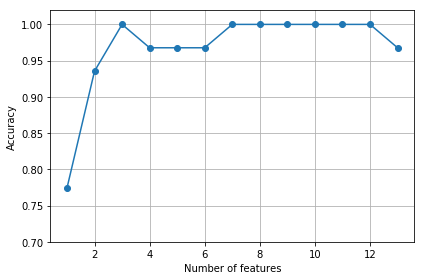

In [97]:
#SBS implementation in action using the KNN classfier from scikit-learn

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

#selecting features
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std,y_train)


#plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat,sbs.scores_,marker='o')
plt.ylim([0.7,1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()


In [98]:
#the classfier achieved 100% accuracy for k = [3,7,8,9,10,11,12]

k3 = list(sbs.subsets_[10]) #reverse order, 13 first
print(df_wine.columns[1:][k3])

Index(['Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines'], dtype='object')


In [99]:
knn.fit(X_train_std,y_train)
print('Training accuracy:', knn.score(X_train_std,y_train))
print('Test accuracy:', knn.score(X_test_std,y_test))

Training accuracy: 0.967741935483871
Test accuracy: 0.9629629629629629


In [100]:
knn.fit(X_train_std[:,k3],y_train)
print('Training accuracy:', knn.score(X_train_std[:,k3],y_train))
print('Test accuracy:', knn.score(X_test_std[:,k3],y_test))

#noted that Wine dataset is a small dataset, which is susceptible to randomness
#how we separate the dataset for training and validation matters

Training accuracy: 0.9516129032258065
Test accuracy: 0.9259259259259259


 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


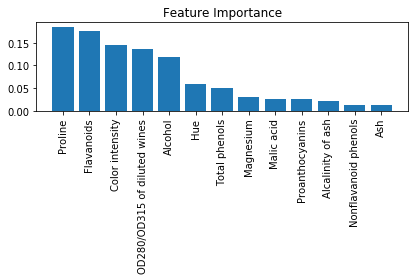

In [110]:
#Assessing feature importance with Randm Forests

#measure feature importance as the averaged impurity decrease computed from all decision trees in the forest
#without making any assumptions about whether our data is linearly separable or not

#standardization and mormalization is not needed in tree-based models

from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices =np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f+1,30,feat_labels[indices[f]],
                            importances[indices[f]]))
    
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
          feat_labels[indices],rotation=90)

plt.xlim([-1,X_train.shape[1]])
plt.tight_layout()
plt.show()



In [111]:
#noted that if two or more features are highly correlated, one feature may be ranked very highly while the information of the other feature(s) may not be fully captured

#'SelectFromModel' object is useful if we want to use the RandomForestClassifer as a feature selector
#and intermediate step in a scikit-learn Pipeline object

#We could set the threshold to 0.1 to reduce the dataset to the five most important features using the following code

from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest,threshold=0.1,prefit=True)
X_selected = sfm.transform(X_train)
print('Number of features that meet this threshold criterion:', X_selected.shape[1])


Number of features that meet this threshold criterion: 5


In [112]:
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529


In [113]:
X_selected

array([[1.362000e+01, 8.000000e-01, 4.400000e+00, 2.050000e+00,
        5.500000e+02],
       [1.376000e+01, 2.740000e+00, 5.400000e+00, 3.000000e+00,
        1.235000e+03],
       [1.373000e+01, 3.250000e+00, 5.700000e+00, 2.710000e+00,
        1.285000e+03],
       [1.351000e+01, 2.530000e+00, 4.200000e+00, 2.870000e+00,
        1.095000e+03],
       [1.260000e+01, 6.600000e-01, 7.100000e+00, 1.580000e+00,
        6.950000e+02],
       [1.208000e+01, 2.290000e+00, 2.900000e+00, 3.190000e+00,
        3.850000e+02],
       [1.222000e+01, 2.040000e+00, 2.700000e+00, 3.020000e+00,
        3.120000e+02],
       [1.251000e+01, 5.800000e-01, 5.450000e+00, 1.510000e+00,
        6.500000e+02],
       [1.269000e+01, 1.460000e+00, 3.050000e+00, 2.060000e+00,
        4.950000e+02],
       [1.182000e+01, 1.640000e+00, 2.060000e+00, 2.440000e+00,
        4.150000e+02],
       [1.349000e+01, 1.840000e+00, 3.740000e+00, 2.780000e+00,
        4.720000e+02],
       [1.388000e+01, 3.560000e+00, 5.43000